## Flight Price Prediction (Regression)

In this project, I'm going to analyse and explore a dataset obtained from “Ease My Trip” website and to conduct various statistical hypothesis tests in order to get meaningful information from it.

“Easemytrip“ is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

The data will be used to make an accurate salary predictor but also to understand what influences prices.

Research Questions
The aim of our study is to answer the below research questions:

How does the ticket price vary between Economy and Business class?
Does price vary with Airlines?
How is the price affected when tickets are bought in just 1 or 2 days before departure?
Does ticket price change based on the departure time and arrival time?
How the price changes with change in Source and Destination?
Does the number of stops influences the price?
What variables influence most the price?
Data collection and methodology
Octoparse scraping tool was used to extract data from the website. Data was collected in two parts: one for economy class tickets and another for business class tickets. A total of 300261 distinct flight booking options was extracted from the site. Data was collected for 50 days, from February 11th to March 31st, 2022. Data source was secondary data and was collected from Ease my trip website.

Dataset
Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.

Features
The various features of the cleaned dataset are explained below:

Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours. 10.Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
Price: Target variable stores information of the ticket price.
Install: xgboost, seaborn, sklearn

#### Import necessary libraries

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [145]:
df=pd.read_csv('C:/Users/User/Downloads/exam/Clean_Dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## EDA

In [146]:
df.shape

(300153, 12)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


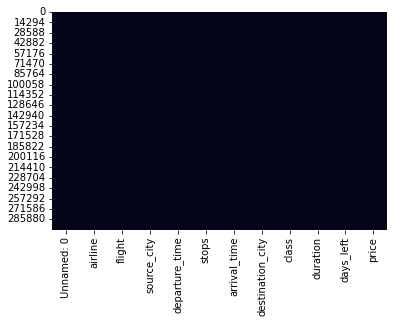

In [148]:
print(df.isnull().sum())
print(sns.heatmap(df.isnull(),cbar=False))

In [149]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


## Univeriate analysis

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64


<AxesSubplot:xlabel='airline', ylabel='count'>

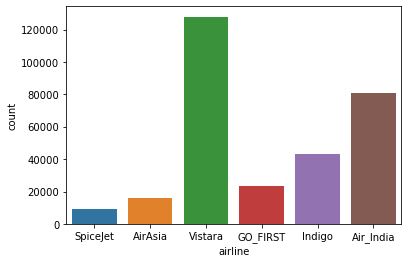

In [150]:
print(df['airline'].value_counts())
sns.countplot(df.airline)

<AxesSubplot:xlabel='destination_city', ylabel='count'>

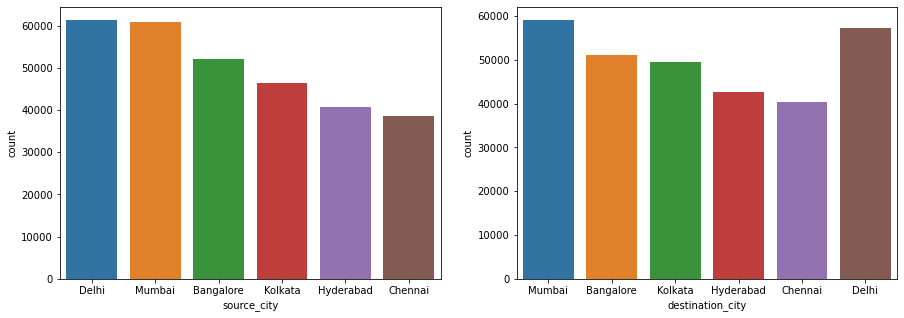

In [151]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df.source_city)
plt.subplot(1,2,2)
sns.countplot(df.destination_city)

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64


<AxesSubplot:xlabel='arrival_time', ylabel='count'>

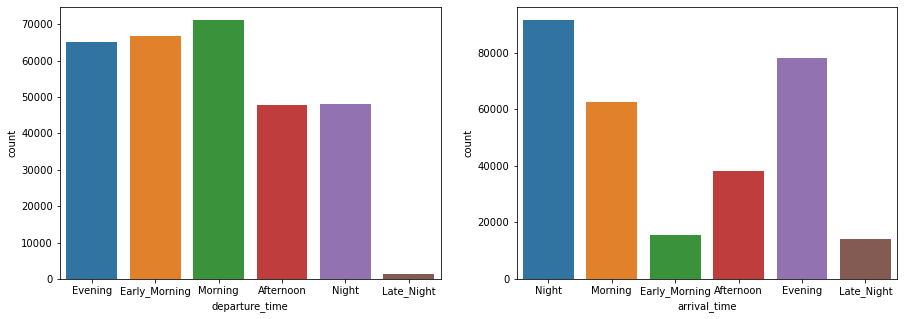

In [152]:
print(df.departure_time.value_counts())
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(df.departure_time)
plt.subplot(1,2,2)
sns.countplot(df.arrival_time)

#### Most of the departing flights are in the morning and most arrival flights are during night. Very few Late night departure and arrival of flights.

Economy     206666
Business     93487
Name: class, dtype: int64


<AxesSubplot:xlabel='class', ylabel='count'>

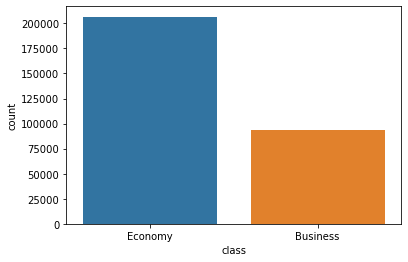

In [153]:
print(df['class'].value_counts())
sns.countplot(df['class'])

## Biveriate Analysis

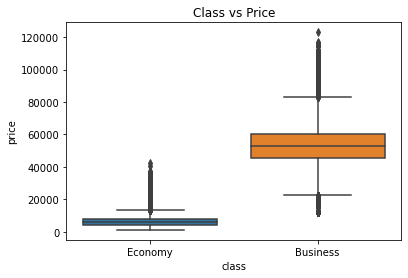

In [154]:
plt.title('Class vs Price')
sns.boxplot(x=df['class'], y=df.price)

plt.show()

airline
AirAsia       4091.072742
Air_India    23507.019112
GO_FIRST      5652.007595
Indigo        5324.216303
SpiceJet      6179.278881
Vistara      30396.536302
Name: price, dtype: float64


<AxesSubplot:xlabel='airline'>

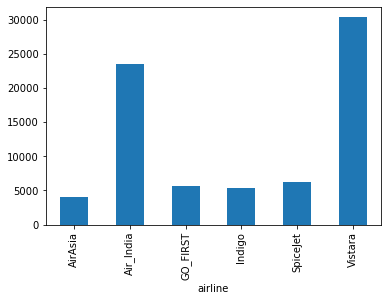

In [155]:
print(df.groupby('airline')['price'].mean())
df.groupby(['airline'])['price'].mean().plot(kind='bar')

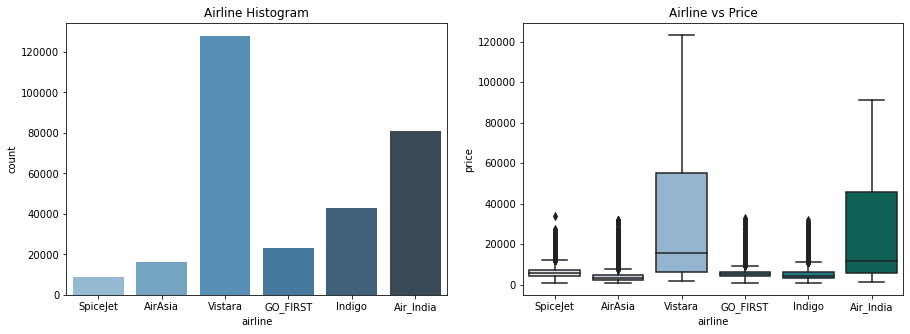

In [156]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Airline Histogram')
sns.countplot(df.airline, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Airline vs Price')
sns.boxplot(x=df.airline, y=df.price, palette=("PuBuGn"))

plt.show()

#### Average price of Vistara flight is highest while that of AirAsia is the lowest.

Text(0.5, 1.0, 'Average prizes depending on the days left')

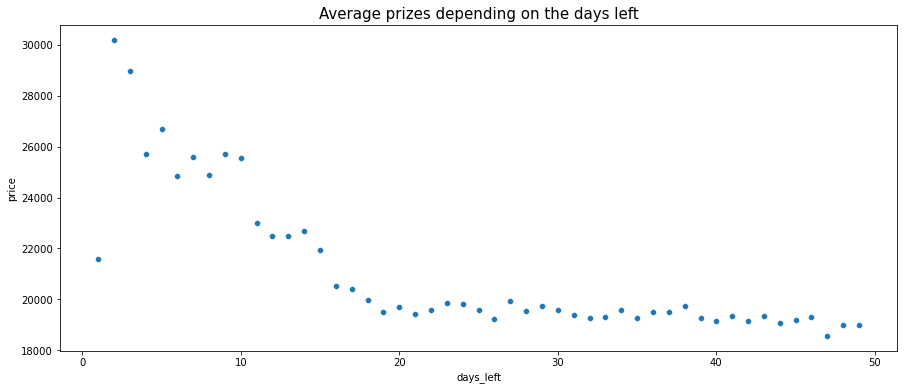

In [157]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(15,6))
sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Average prizes depending on the days left",fontsize=15)

#### Prices are low when a ticket is booked many days before the departure and price increases as the days left get reduced. Also there is a drop in prices one day before the departure.

Text(0.5, 1.0, 'Airline prices based on the arrival time')

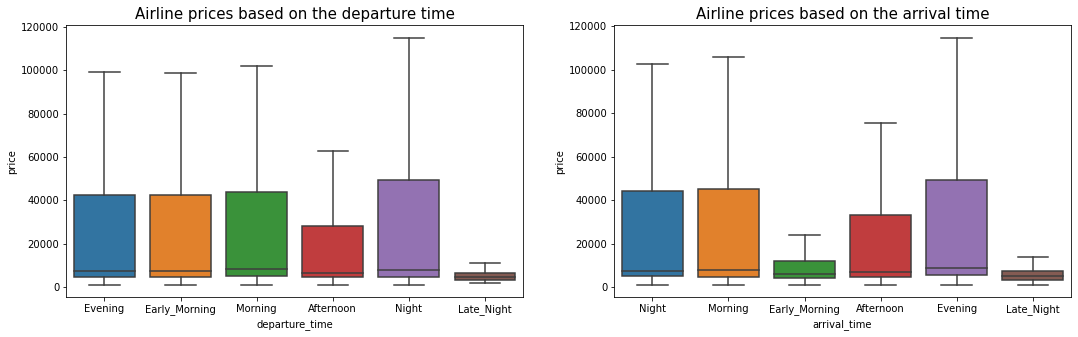

In [158]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Airline prices based on the departure time",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Airline prices based on the arrival time",fontsize=15)

### As expected, leaving at night or arriving at night remains the cheapest way to travel. But it's also visible that arriving early morning is also cheap and afternoon flight are a bit cheaper that evening, morning and night flight.

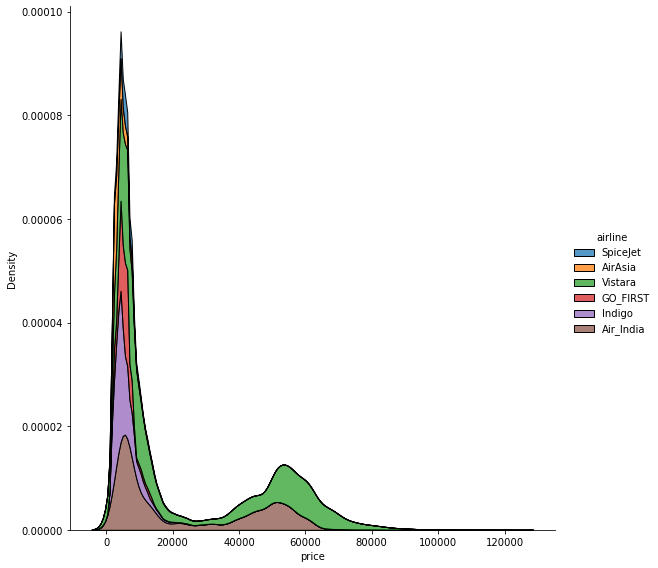

In [159]:
sns.displot(x="price", hue="airline", kind="kde",
            multiple="stack",data=df,height=8)

In [160]:
# vistara is costly followed by air india , spicejet,gofirst,indigo,airasia is cheaper than all


In [161]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [162]:
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [163]:
#Encode the ordinal variables "stops" and "class".
df["stops"] = df["stops"].replace({'zero':0,'one':1,'two_or_more':2}).astype(int)
df["class"] = df["class"].replace({'Economy':0,'Business':1}).astype(int)
dummies_variables = ["airline","source_city","destination_city","departure_time","arrival_time"]
dummies = pd.get_dummies(df[dummies_variables], drop_first= True)
df = pd.concat([df,dummies],axis=1)
df = df.drop(["flight","airline","source_city","destination_city","departure_time","arrival_time"],axis=1)

In [164]:
df.columns

Index(['stops', 'class', 'duration', 'days_left', 'price', 'airline_Air_India',
       'airline_GO_FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_Vistara', 'source_city_Chennai', 'source_city_Delhi',
       'source_city_Hyderabad', 'source_city_Kolkata', 'source_city_Mumbai',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'departure_time_Early_Morning',
       'departure_time_Evening', 'departure_time_Late_Night',
       'departure_time_Morning', 'departure_time_Night',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning',
       'arrival_time_Night'],
      dtype='object')

In [165]:
x=df.drop(['price'],axis=1)
y=df.price

In [169]:
from sklearn.metrics import mean_squared_error,r2_score

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1,shuffle=True)

In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [173]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [174]:
y_pred1=reg.predict(x_test)

In [181]:
print('Test data')
print('RMSE : ', np.round(np.sqrt(mean_squared_error(y_test,y_pred1)),4))
print('R2 score : ', r2_score(y_test,y_pred1))

Test data
RMSE :  6762.9669
R2 score :  0.9109475977482543


## XGB REGRESSOR

In [176]:
xgb=XGBRegressor(n_jobs=5,learning_rate=0.1,max_depth=10,random_state=1)
xgb.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=5,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [177]:
y_pred2=xgb.predict(x_test)

In [182]:
print('Test data')
print('RMSE :', np.round(np.sqrt(mean_squared_error(y_test,y_pred2)),4))
print('R2 score: ', r2_score(y_test,y_pred2))

Test data
RMSE : 2901.3697
R2 score:  0.9836100645734779


Text(0.5, 1.0, 'XGBRegressor')

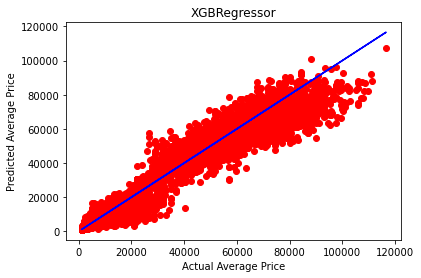

In [183]:
plt.scatter(x=y_test,y=y_pred2,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Average Price')
plt.ylabel('Predicted Average Price')
plt.title('XGBRegressor')

In [184]:
ytrain_pred=xgb.predict(x_train)

In [186]:
print('Train data')
print('RMSE :', np.round(np.sqrt(mean_squared_error(y_train,ytrain_pred)),4))
print('R2 score: ', r2_score(y_train,ytrain_pred))

Train data
RMSE : 2660.7283
R2 score:  0.9862763970699333


## XGB REGRESSOR GIVING 0.98.
## It seems that best results are given by the XGBRegressor. This may be explain by the fact the some relationships ar enot linear like the duration or the days_left. Thus a more flexible algorithm like XGBRegressor tends to give better results. 

In [187]:
print('Test data')
print('RMSE :', np.round(np.sqrt(mean_squared_error(y_test,y_pred2)),4))
print('R2 score: ', r2_score(y_test,y_pred2))
print('Train data')
print('RMSE :', np.round(np.sqrt(mean_squared_error(y_train,ytrain_pred)),4))
print('R2 score: ', r2_score(y_train,ytrain_pred))

Test data
RMSE : 2901.3697
R2 score:  0.9836100645734779
Train data
RMSE : 2660.7283
R2 score:  0.9862763970699333


In [188]:
knn=KNeighborsRegressor(n_neighbors=50)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [58]:
numcols=df.select_dtypes(include='int')

days_left


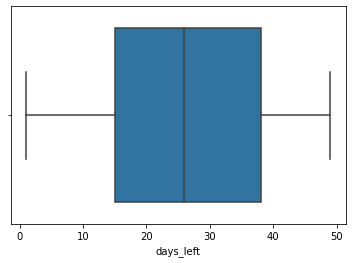

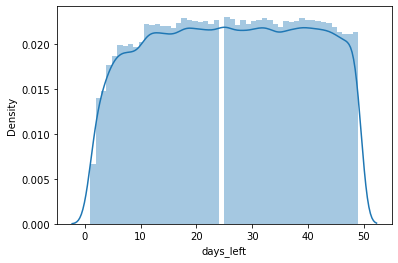

price


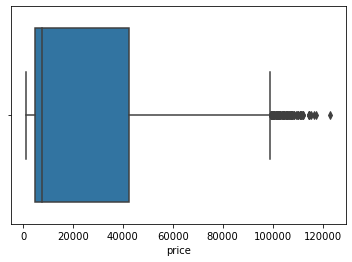

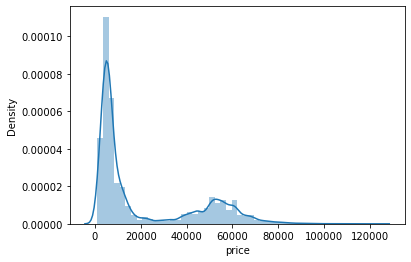

In [60]:
for i in numcols:
    print(i)
    sns.boxplot(df[i])
    plt.show()
    sns.distplot(df[i])
    plt.show()

In [18]:
df1['im_price']=np.where(df1['price']>=98500,round(df1['price'].median()),df1['price'])

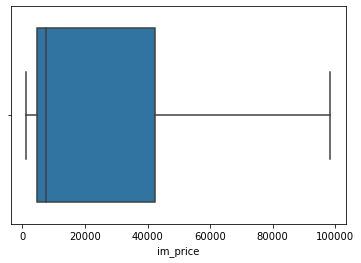

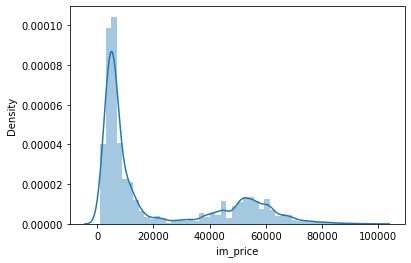

In [36]:
sns.boxplot(df1['im_price'])
plt.show()
sns.distplot(df1['im_price'])
plt.show()

In [19]:
df1.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,im_price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,5955


In [20]:
df2=df1.drop(['flight','price'],axis=1)
df2

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,im_price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [22]:
df3=pd.concat([dfa,dfb,dfc,dfd,dfe,dff,dfg,df2[['duration','im_price']]],axis=1)
df3.head()

,Air_India,GO_FIRST,Indigo,SpiceJet,Vistara,Economy,Early_Morning,Evening,Late_Night,Morning,...,47,48,49,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,duration,im_price
0,0,0,0,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,2.17,5953
1,0,0,0,1,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,2.33,5953
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,2.17,5956
3,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,2.25,5955
4,0,0,0,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,2.33,5955


In [23]:
df3.shape

(300153, 73)

In [24]:
x=df3.drop(['im_price'],axis=1)
y=df3['im_price']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(240122, 72)
(60031, 72)
(240122,)
(60031,)


In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test,y_test)*100
print("ML model Accuracy is",accuracy,'%')

ML model Accuracy is 91.21514619314715 %


In [28]:
print('r2_score',r2_score(y_test,y_pred))

r2_score 0.9121514619314715
